In [ ]:
# seaborn 버전에 맞게 설치
!pip install seaborn==0.11

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
from PIL import Image, ImageDraw, ImageFont
import random

In [3]:
# train.json file path
train_json = "../train.json"

In [4]:
# train.json 불러와 eda 할 수 있게 설정
with open(train_json, "r", encoding="utf8") as outfile:
    json_data = json.load(outfile)

images = json_data["images"]
categories = json_data["categories"]
annotations = json_data["annotations"]

for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    if 'bbox' in images[image_id]:
        images[image_id]['bbox'].append(bbox)
        images[image_id]['bbox_category'].append(category_id)
    else:
        images[image_id]['bbox'] = [bbox]
        images[image_id]['bbox_category'] = [category_id]

<AxesSubplot:xlabel='category_id', ylabel='count'>

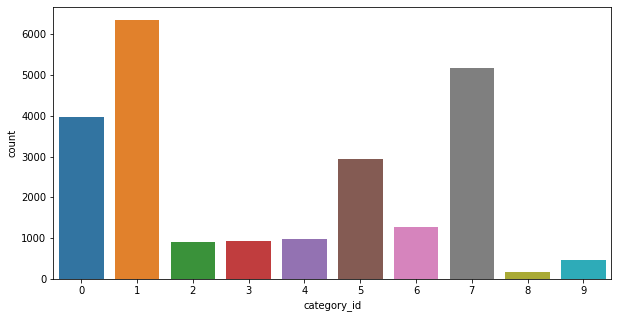

In [5]:
# Annotation의 카테고리 분포 
plt.rcParams["figure.figsize"] = (10,5)
categories_counter = [annotation["category_id"] for annotation in annotations]
dataframe = pd.DataFrame(categories_counter, columns=['category_id'])
sns.countplot(x='category_id', data=dataframe)

<AxesSubplot:xlabel='category_set', ylabel='category_count'>

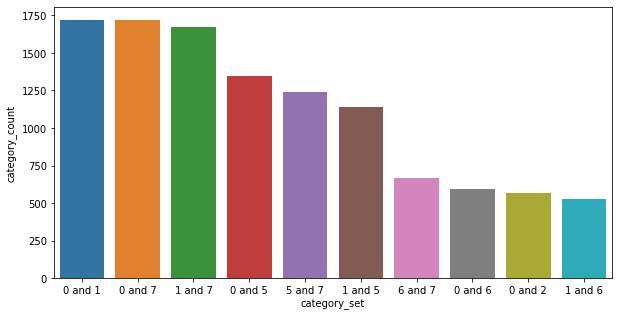

In [6]:
# 같이 많이 나오는 카테고리
cate_combination = []
for image in images:
    combi = list(combinations(set(image['bbox_category']), 2))
    if combi:
        cate_combination.extend(combi)
    cate_combination.extend(list(combinations(set(image['bbox_category']), 2)))
combi_counter = Counter(cate_combination).most_common(10)
category_set = [ f"{c[0][0]} and {c[0][1]}"for c in combi_counter]
category_count = [ c[1] for c in combi_counter]
raw_data = {
    'category_set': category_set,
    'category_count': category_count
}
dataframe = pd.DataFrame(raw_data)
sns.barplot(x='category_set', y='category_count',data=dataframe)

<AxesSubplot:xlabel='bbox_number', ylabel='count'>

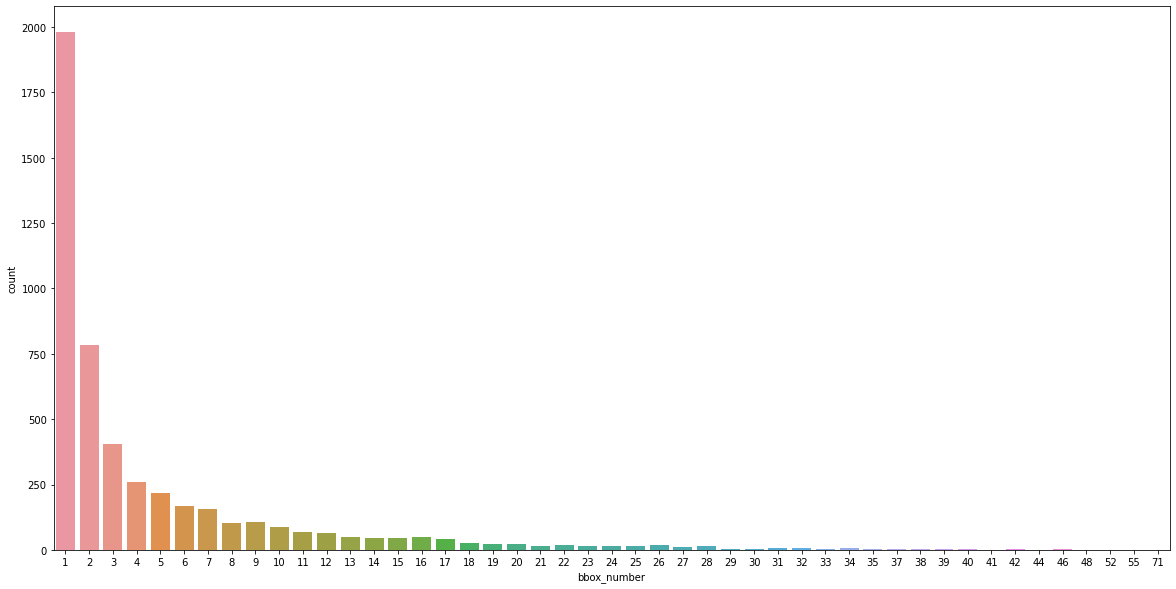

In [7]:
# 한 이미지의 들어있는 Annotation의 개수 분포
image_counter = Counter([annotation["image_id"] for annotation in annotations])
image_counter = list(image_counter.items())
image_counter.sort(key=lambda x : x[1], reverse=True)

plt.rcParams["figure.figsize"] = (20,10)
dataframe = pd.DataFrame(image_counter)
dataframe.columns = ['images_id', 'bbox_number']
sns.countplot(x='bbox_number', data=dataframe)

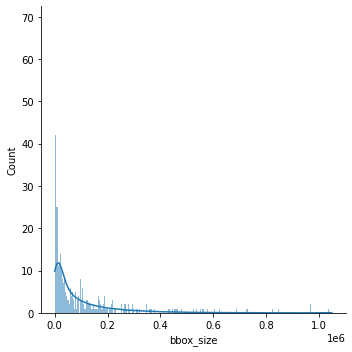

In [8]:
# Bbox 크기 분포
plt.rcParams["figure.figsize"] = (100,70)
bbox_size = [ annotation["area"] for annotation in annotations ]
dataframe = pd.DataFrame(bbox_size, columns=['bbox_size'])
sns.displot(dataframe, x="bbox_size", kde=True, bins=20000)

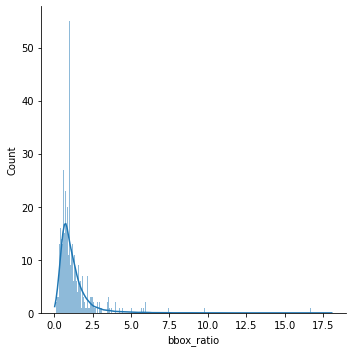

In [9]:
# Bbox 비율 분포
bbox_ratio = [ annotation['bbox'][3] / annotation['bbox'][2] for annotation in annotations ]
dataframe = pd.DataFrame(bbox_ratio, columns=['bbox_ratio'])
sns.displot(dataframe, x="bbox_ratio", kde=True, bins=20000)

In [12]:
# 이미지 불러오기 위한 함수
def getPILImage(imageId):
	firstName = "../train"

	fileName = f"{imageId:04}.jpg"

	imagePath = os.path.join(firstName,fileName)
	return Image.open(imagePath)

def drawBboxInImage(img, bbox_cate, bbox):
	draw = ImageDraw.Draw(img)
	for categoryName, bbox in zip(bbox_cate, bbox):

		x1, y1, width, length = bbox
		draw.rectangle(((x1,y1),(x1+width,y1+length)),width=3 ,outline=(random.randint(0,255),random.randint(0,255),random.randint(0,255)))

		imageFont = ImageFont.load_default()
		text = categoryName
		text_width, text_height = imageFont.getsize(text)
		draw.rectangle(((x1, y1 - text_height), (x1 + text_width, y1)), fill=(0, 0, 0))
		draw.text((x1, y1 - text_height), text, font=imageFont, fill=(255, 255, 255))

	return img

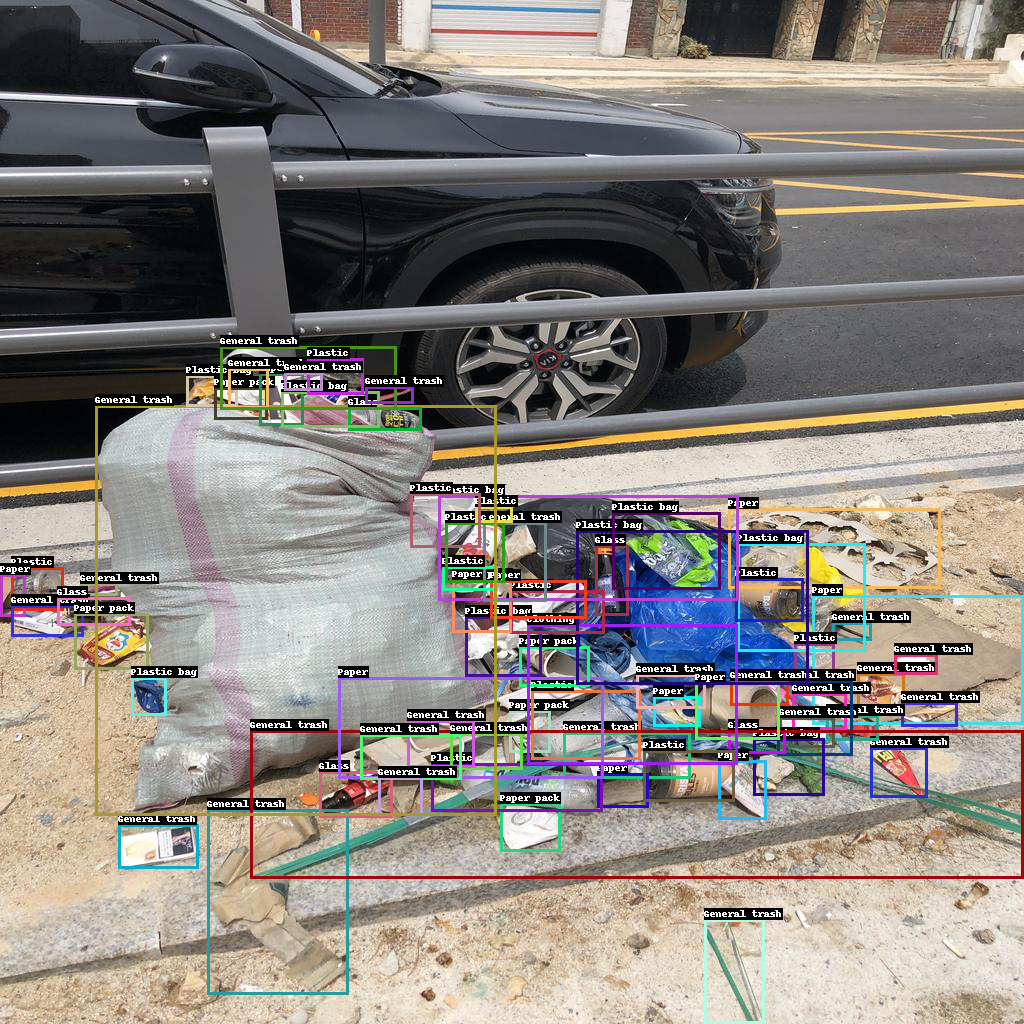

In [13]:
# 가장 많은 Annotation 가지는 이미지
imageId = 4197
bbox_cate = [categories[i]["name"] for i in images[imageId]['bbox_category']]
bbox = images[imageId]['bbox']
img = getPILImage(imageId)
imgs = drawBboxInImage(img,bbox_cate, bbox)

imgs

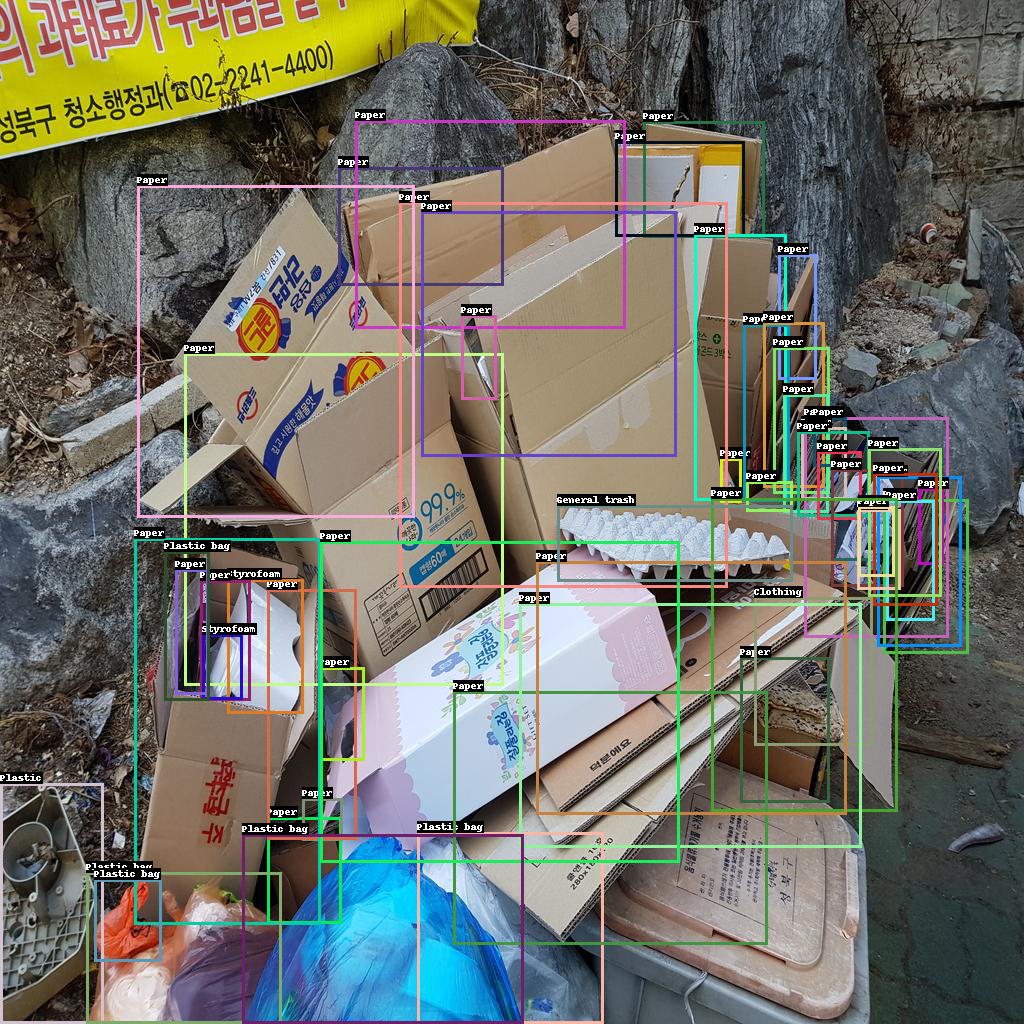

In [14]:
# 두번째로 많은 Annotation 가지는 이미지
imageId = 946
bbox_cate = [categories[i]["name"] for i in images[imageId]['bbox_category']]
bbox = images[imageId]['bbox']
img = getPILImage(imageId)
imgs = drawBboxInImage(img,bbox_cate, bbox)

imgs

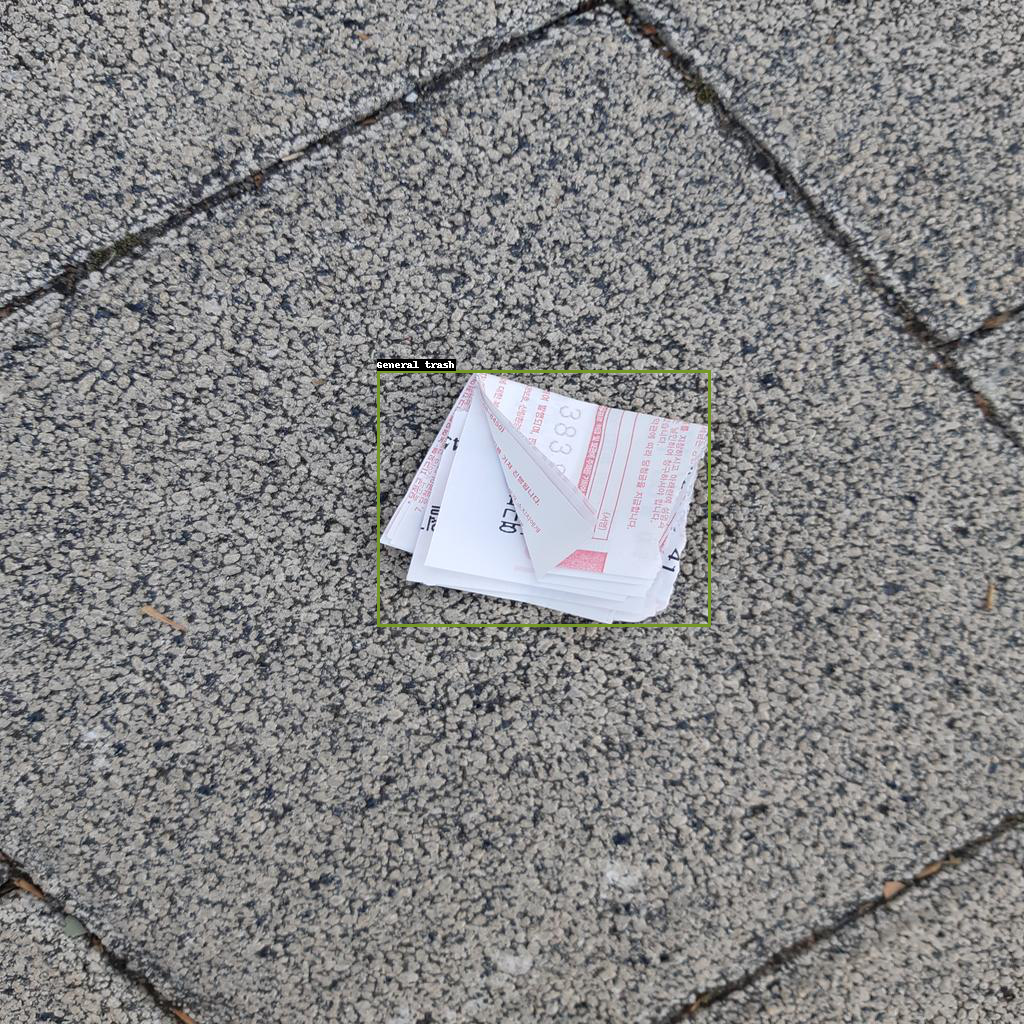

In [15]:
# Annotation 하나 가지는 이미지
imageId = 4878
bbox_cate = [categories[i]["name"] for i in images[imageId]['bbox_category']]
bbox = images[imageId]['bbox']
img = getPILImage(imageId)
imgs = drawBboxInImage(img,bbox_cate, bbox)

imgs